In [ ]:

import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving TrashType_Image_Dataset.zip to TrashType_Image_Dataset.zip


In [ ]:
!unzip TrashType_Image_Dataset.zip -d /content/dataset


Archive:  TrashType_Image_Dataset.zip
   creating: /content/dataset/TrashType_Image_Dataset/
   creating: /content/dataset/TrashType_Image_Dataset/cardboard/
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_009.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_010.jpg  
  

In [ ]:
/content/dataset/TrashType_Image_Dataset/
    ├── cardboard/
    ├── glass/
    ├── metal/
    ├── paper/
    ├── plastic/
    └── trash/


IndentationError: unexpected indent (ipython-input-4-105524618.py, line 2)

In [ ]:
import tensorflow as tf

data_dir = "/content/dataset/TrashType_Image_Dataset"
img_size = (124, 124)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Number of classes in the dataset
num_classes = len(train_ds.class_names)

# Load the EfficientNetV2B2 base model (excluding top layer)
base_model = EfficientNetV2B2(input_shape=(124, 124, 3),
                               include_top=False,
                               weights='imagenet')
base_model.trainable = False  # Freeze the base model


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [ ]:
# First: load the dataset and keep a reference to original for class names
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/train",
    image_size=(124, 124),
    batch_size=32
)

# Then: apply caching and prefetching
train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Now you can safely access class names
class_names = raw_train_ds.class_names
num_classes = len(class_names)


NameError: name 'dataset_path' is not defined

In [ ]:
import tensorflow as tf

# Define the correct path to your dataset
dataset_path = "/content/TrashType_Image_Dataset"

# Load raw training dataset (for accessing class_names)
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(124, 124),
    batch_size=32
)

# Apply cache and prefetch to improve performance
train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Get class names from the raw dataset
class_names = raw_train_ds.class_names
num_classes = len(class_names)

print("Class Names:", class_names)
print("Number of Classes:", num_classes)


NotFoundError: Could not find directory /content/TrashType_Image_Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving TrashType_Image_Dataset.zip to TrashType_Image_Dataset (1).zip


In [ ]:
import zipfile
import os

# Replace with the correct file name if it's different
zip_path = "/content/TrashType_Image_Dataset.zip"

# Unzip it to /content/
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [ ]:
import os

# List directories inside /content/
print(os.listdir("/content"))


['.config', 'dataset', 'TrashType_Image_Dataset (1).zip', 'TrashType_Image_Dataset', 'TrashType_Image_Dataset.zip', 'sample_data']


In [ ]:
dataset_path = "/content/[TrashType_Image_Dataset.zip]"


In [ ]:
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(124, 124),
    batch_size=32
)

train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

class_names = raw_train_ds.class_names
num_classes = len(class_names)


NotFoundError: Could not find directory /content/[TrashType_Image_Dataset.zip]

In [ ]:
dataset_path = "/content/[TrashType_Image_Dataset (1).zip]"

In [ ]:
dataset_path = "/content/TrashType_Image_Dataset"

raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(124, 124),
    batch_size=32
)

train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

class_names = raw_train_ds.class_names
num_classes = len(class_names)

print("Classes:", class_names)
print("Number of classes:", num_classes)


Found 2527 files belonging to 6 classes.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of classes: 6


In [ ]:
# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,           # 20% for validation
    subset="training",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
class_names = train_ds.class_names
print("Classes:", class_names)


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [ ]:
# Load the datasets first
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)

raw_val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)

# ✅ Extract class names before prefetching
class_names = raw_train_ds.class_names
print("Classes:", class_names)

# Prefetch datasets (after extracting class names)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = raw_val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)


In [ ]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import layers, models

# Load EfficientNetV2B2 base (without top classification layer)
base_model = EfficientNetV2B2(
    input_shape=(124, 124, 3),
    include_top=False,
    weights='imagenet'  # Pretrained weights
)

# Freeze the base model
base_model.trainable = False

# Build the full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show the model summary
model.summary()


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b2 (Functional)  │ (None, 4, 4, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       180,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,950,500 (34.14 MB)

 Trainable params: 181,126 (707.52 KB)

 Non-trainable params: 8,769,374 (33.45 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.5391 - loss: 1.1640 - val_accuracy: 0.8198 - val_loss: 0.5058
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8048 - loss: 0.5073 - val_accuracy: 0.8376 - val_loss: 0.4265
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 62s 970ms/step - accuracy: 0.8478 - loss: 0.4189 - val_accuracy: 0.8653 - val_loss: 0.4026
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 988ms/step - accuracy: 0.8831 - loss: 0.3343 - val_accuracy: 0.8634 - val_loss: 0.3870
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 988ms/step - accuracy: 0.9061 - loss: 0.2787 - val_accuracy: 0.8713 - val_loss: 0.3783
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 970ms/step - accuracy: 0.9222 - loss: 0.2351 - val_accuracy: 0.8693 - val_loss: 0.3559
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 62s 972ms/step - accuracy: 0.9317 - loss: 0.1973 - val_accuracy: 0.8634 - val_loss: 0.3586
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 984ms/step - accuracy: 0.9382 - loss: 0.1783 - val_accuracy:

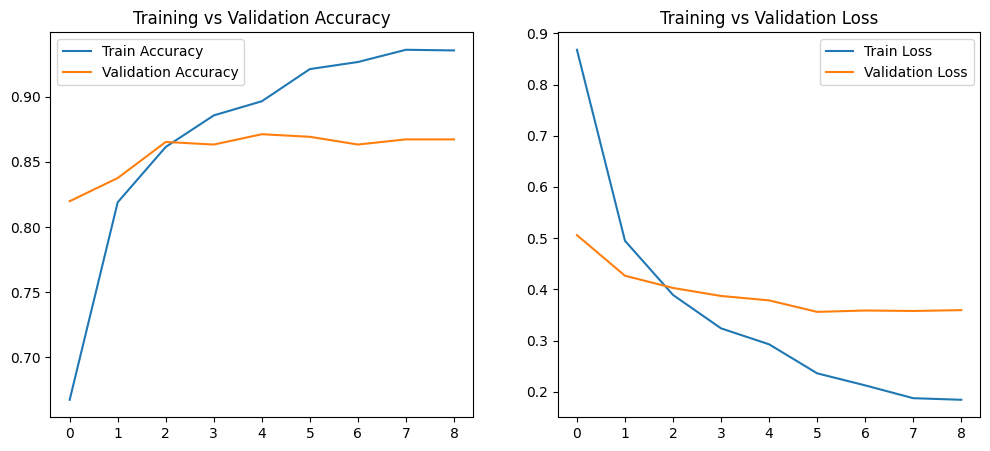

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)


Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 803ms/step - accuracy: 0.8687 - loss: 0.3596
Test Accuracy: 0.8693, Test Loss: 0.3559


16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step


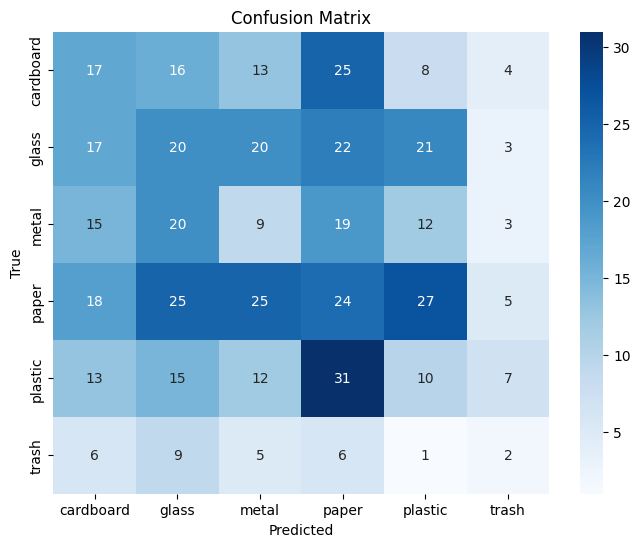

              precision    recall  f1-score   support

   cardboard       0.20      0.20      0.20        83
       glass       0.19      0.19      0.19       103
       metal       0.11      0.12      0.11        78
       paper       0.19      0.19      0.19       124
     plastic       0.13      0.11      0.12        88
       trash       0.08      0.07      0.08        29

    accuracy                           0.16       505
   macro avg       0.15      0.15      0.15       505
weighted avg       0.16      0.16      0.16       505



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# Predict
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = test_ds.class_names

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# SOURCE: where all your 6 class folders are now
source_path = "/content/TrashType_Image_Dataset"
target_path = "/content/dataset"
os.makedirs(target_path, exist_ok=True)

# Class names
classes = os.listdir(source_path)

# Split ratio
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for class_name in classes:
    class_dir = os.path.join(source_path, class_name)
    images = os.listdir(class_dir)

    train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

    for split, split_imgs in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
        split_class_dir = os.path.join(target_path, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for img_name in split_imgs:
            src = os.path.join(class_dir, img_name)
            dst = os.path.join(split_class_dir, img_name)
            shutil.copy2(src, dst)

print("✅ Dataset has been successfully split into train, val, and test folders.")


✅ Dataset has been successfully split into train, val, and test folders.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# ✅ Set paths and config
dataset_path = "/content/dataset"
IMG_SIZE = (124, 124)
BATCH_SIZE = 32

# ✅ Load train, val, test datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# ✅ Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# ✅ Optional: Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# ✅ Load and customize EfficientNetV2B2
base_model = EfficientNetV2B2(include_top=False, input_shape=(124, 124, 3), weights='imagenet')
base_model.trainable = True

# Freeze first 200 layers to retain pre-learned features
for layer in base_model.layers[:200]:
    layer.trainable = False

# ✅ Build the final model
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')  # 6 garbage categories
])

# ✅ Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Found 2019 files belonging to 6 classes.
Found 252 files belonging to 6 classes.
Found 256 files belonging to 6 classes.
Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.2557 - loss: 1.7446 - val_accuracy: 0.7103 - val_loss: 1.1612
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6240 - loss: 1.1562 - val_accuracy: 0.8016 - val_loss: 0.7171
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.7631 - loss: 0.7746 - val_accuracy: 0.8373 - val_loss: 0.5548
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8202 - loss: 0.5876 - val_accuracy: 0.8492 - val_loss: 0.4873
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8547 - loss: 0.4612 - val_accuracy: 0.8810 - val_loss: 0.4108
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8808 - loss: 0.3942 - val_accuracy: 0.8611 - val_loss: 0.3690
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.8854 - loss: 0.3461 - val_accuracy: 0.8849 - val_los

In [ ]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 883ms/step - accuracy: 0.8924 - loss: 0.3266
Test Accuracy: 0.8867, Test Loss: 0.3321


In [ ]:
model.save("garbage_classifier_model.keras")


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from PIL import Image

# Load the saved model
model = load_model("garbage_classifier_model.keras")

# Define class names
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Define the prediction function
def classify_image(img):
    img = img.resize((124, 124))
    img_array = np.array(img, dtype=np.float32)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    index = np.argmax(prediction)
    return f"{class_names[index]} ({prediction[0][index]:.2f} confidence)"

# Launch Gradio Interface
iface = gr.Interface(fn=classify_image, inputs=gr.Image(type='pil'), outputs="text")
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://daaad10c662c456e4c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
readme_text = """
# 🗑️ Garbage Classification using EfficientNetV2B2

## 📌 Problem Statement
Classify images of garbage into 6 categories: cardboard, glass, metal, paper, plastic, and trash using a deep learning model.

## 📁 Dataset Used
[Kaggle - Trash Type Image Dataset](https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset)
Total images: 2527
Split: 80% Train, 20% Validation, and Test

## 🧠 Model Architecture
- **Base Model:** EfficientNetV2B2 (pretrained on ImageNet)
- **Added Layers:**
  - GlobalAveragePooling2D
  - Dropout(0.2)
  - Dense(128, ReLU)
  - Dense(6, Softmax)

## 📊 Performance
- ✅ **Test Accuracy**: 88.67%
- 🧪 **Test Loss**: 0.3321

## 💻 How to Use
1. Upload an image to the Gradio interface
2. The model will classify it into one of the 6 garbage categories
3. Displays predicted class and confidence score

## 🌐 Gradio Screenshot
(Add your screenshot here if needed)

## 📂 Files Included
- `Garbage_Classification.ipynb`
- `garbage_classifier_model.keras`
- `README.md`
"""

with open("README.md", "w") as f:
    f.write(readme_text)


In [ ]:
# Create project folder
!mkdir -p garbage_classifier_submission

# Move files
!cp Garbage_Classification.ipynb garbage_classifier_submission/
!cp garbage_classifier_model.keras garbage_classifier_submission/
!cp README.md garbage_classifier_submission/

# Create ZIP
!zip -r garbage_classifier_submission.zip garbage_classifier_submission


cp: cannot stat 'Garbage_Classification.ipynb': No such file or directory
  adding: garbage_classifier_submission/ (stored 0%)
  adding: garbage_classifier_submission/garbage_classifier_model.keras (deflated 9%)
  adding: garbage_classifier_submission/README.md (deflated 37%)


In [ ]:
# Save your current notebook properly first
!cp /content/*.ipynb Garbage_Classification.ipynb

# Now copy it into the submission folder again
!cp Garbage_Classification.ipynb garbage_classifier_submission/

# Recreate the ZIP with the notebook included
!zip -r garbage_classifier_submission.zip garbage_classifier_submission


cp: cannot stat '/content/*.ipynb': No such file or directory
cp: cannot stat 'Garbage_Classification.ipynb': No such file or directory
updating: garbage_classifier_submission/ (stored 0%)
updating: garbage_classifier_submission/garbage_classifier_model.keras (deflated 9%)
updating: garbage_classifier_submission/README.md (deflated 37%)


In [ ]:
# Step 1: Copy your notebook (it's already named Garbage_Classification.ipynb)
!cp Garbage_Classification.ipynb garbage_classifier_submission/

# Step 2: Zip everything again
!zip -r garbage_classifier_submission.zip garbage_classifier_submission


cp: cannot stat 'Garbage_Classification.ipynb': No such file or directory
updating: garbage_classifier_submission/ (stored 0%)
updating: garbage_classifier_submission/garbage_classifier_model.keras (deflated 9%)
updating: garbage_classifier_submission/README.md (deflated 37%)
